![Wolfe](https://s3.amazonaws.com/lquant-images/wolfe_luo.jpg)

## Overview of Risk Model API

Features:
1. Upload custom data 
2. Add/Remove Factors 
3. Update parameters in template


### Data for Portfolio Simulation

In [74]:
import pandas as pd
data = pd.read_csv('PortSimulator.csv')
data.head()

data.columns = ['DATE','CUSTOM_RISK_FACTOR','TICKER']
data.head()

,DATE,CUSTOM_RISK_FACTOR,TICKER
0,2021-01-29,0.000325,AAL
1,2021-01-29,0.000258,PNW
2,2021-01-29,0.006676,ABT
3,2021-01-29,0.003139,AMD
4,2021-01-29,0.001797,APD


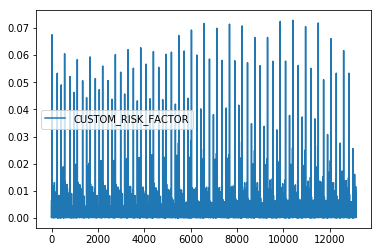

In [85]:
%matplotlib inline
data.plot()

In [75]:
data.DATE.unique()

array(['2021-01-29', '2021-02-26', '2021-03-31', '2021-04-30',
       '2021-05-28', '2021-06-30', '2021-07-30', '2021-08-31',
       '2021-09-30', '2021-10-29', '2021-11-30', '2021-12-31',
       '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-29',
       '2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
       '2022-09-30', '2022-10-31', '2022-11-30', '2022-12-30'],
      dtype=object)

## Requirements and Presteps

1. Copy pyqes [python file]( https://github.com/wolferesearch/docs/tree/master/micro-services/api/python/pyqes) from github to your local directory from Github. 
2. Ensure you have [Pandas](https://pandas.pydata.org/) and [requests](https://pypi.org/project/requests/) package in your python kernel. 

## Authentication and Connection

The API is protected using Username and Password. In case you have not received it, please [email](mailto:luo.qes@wolferesearch.com) to apply for API account. 

The connection object is the gateway to accessing the API. It allows you to access the catalog, portfolios, templates, risk models etc. 

In [78]:
## Open connection using username/password. 
from pyqes import micsvc
connection = micsvc.Connection(username='*******', password = '*******')

In [82]:
connection.jobs

,ENDTIME,MESSAGE,STARTTIME,STATUS,TYPEID,USER_,UUID
4,1.677258e+12,Job Completed,2023-02-24 17:01:15.469,SUCCESS,1,hjain,6386b15d-bffa-4b45-af5b-6d2f5dfbefd2
3,1.677189e+12,Job Completed 0,2023-02-23 21:41:39.708,SUCCESS,2,hjain,fbbffa74-7443-4e91-bd27-c03ef1c55ea2
2,1.677188e+12,"Error in if (optRequest$user_data$fmt == ""csv""...",2023-02-23 21:34:29.207,ERROR,2,hjain,63ad5f21-3ede-45c8-826a-50175b3f69d0
12,1.677188e+12,"Error in doTryCatch(return(expr), name, parent...",2023-02-23 21:31:21.147,ERROR,2,hjain,98d9b64f-ba3b-4263-bf27-862cc836f9e5
19,1.676580e+12,Job Completed,2023-02-16 20:38:01.642,SUCCESS,1,hjain,62c29c61-4837-4087-a39b-3b7718644255
18,1.676575e+12,Job Completed,2023-02-16 19:09:41.317,SUCCESS,1,hjain,ace75062-27cb-4685-80a6-e522d8acae86
14,1.676574e+12,Job Completed,2023-02-16 18:57:09.364,SUCCESS,1,hjain,f9aeca73-20a0-4ac8-9bbd-5f3d8b2ba35a
17,1.676569e+12,"Error in doTryCatch(return(expr), name, parent...",2023-02-16 17:43:02.864,ERROR,1,hjain,171a7b34-3fcb-4106-a599-96a1eae397aa
7,1.675655e+12,Job Completed,2023-02-06 03:33:41.705,SUCCESS,2,hjain,244c6d97-c887-4b28-b2fb-86e06e1b2cd4
1,1.675463e+12,Job Completed 0,2023-02-03 22:26:28.883,SUCCESS,3,hjain,27c21c03-39e1-449c-8f7c-75bcd6c5840b


## Risk Model Builder Class

In [79]:
# Use connection object to get a new instance of black litterman
risk_model_builder = connection.get_risk_model_builder()

In [80]:
risk_model_builder = connection.get_risk_model_builder()
_ = risk_model_builder.remove_risk_factors(['DIVYLD_TRL'])
_ = risk_model_builder.add_risk_factors(['QES_LEAP_1_MTH_SCORE'])

risk_model_builder.new_request(universe = 'US_1', template = 'default', startDate = '2021-01-31', endDate = '2023-01-31', freq = '1me')



In [59]:
risk_model_builder.new_request(universe = 'US_1', template = 'default', startDate = '2021-01-31', endDate = '2023-01-31', freq = '1me')

In [67]:
risk_model_builder.info()

{'dates': ['2021-01-31',
  '2021-02-28',
  '2021-04-30',
  '2021-07-31',
  '2021-10-31',
  '2022-01-31',
  '2022-04-30',
  '2022-07-31',
  '2022-10-31',
  '2023-01-31'],
 'endTime': 'null',
 'message': 'STARTED',
 'startTime': '"2023-02-24 17:01:15.469782"',
 'status': 'STARTED',
 'type': 1,
 'uuid': '6386b15d-bffa-4b45-af5b-6d2f5dfbefd2'}

In [72]:
data1 = risk_model_builder.get_data(dated = '2021-01-31')

In [73]:
data1['2021-01-31/R1_D1_20210131.exp']

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Book to Market,QES_LEAP_1_MTH_SCORE,Energy,...,Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
ID,,,,,,,,,,,,,,,,,,,,,
04M5VVVP14,1.058843,-4.604318,-1.589686,-0.317186,-0.243374,2.861267,-1.625759,-2.417500,4.044763,0,...,0,0,0,0,0,0,0,0,0,0
K9RQE6VQGZ,-4.616281,-2.774386,-3.708610,-4.610570,-2.555120,0.236538,2.597828,1.440833,-4.197911,0,...,0,0,0,0,0,0,0,0,0,0
04M5GK7JK4,0.563681,-0.001989,-0.337939,-0.512534,-1.627854,0.798178,-2.269853,1.882697,-4.007004,0,...,0,0,0,0,0,0,0,0,0,0
04M5J6K6G4,2.368454,0.362735,-0.915996,-1.497288,1.420204,-0.462474,0.795664,-0.754140,-0.093612,0,...,0,0,0,0,0,0,0,0,1,0
04M5JOJP14,2.341557,3.265527,-0.093539,-4.740895,2.027344,0.295157,1.452696,0.761451,1.782226,0,...,0,1,0,0,0,0,0,0,0,0
04M5JN8NG4,0.307970,1.456157,0.517669,-0.135359,0.981599,-2.273764,2.884693,-0.582240,-0.687433,0,...,0,0,0,0,0,0,0,0,0,0
04M5620114,3.956250,-1.442468,-1.727343,-4.983875,1.496001,0.267722,0.526543,-1.698835,1.232814,1,...,0,0,0,0,0,0,0,0,0,0
04M5O1EOK4,-0.214099,0.669199,1.760311,-0.377526,1.948629,-0.826723,1.889873,-3.054266,-1.415678,0,...,0,0,0,0,0,1,0,0,0,0
04M5YO72K4,-0.045223,-1.560146,0.286131,-2.859560,1.760300,-1.573454,2.214271,-2.110151,-1.417578,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
print(risk_model_builder.get_logs())

$`__name__`
[1] "default"

$`__type__`
[1] "ltool.risk.RiskModelBuilder"

$covArgs
$covArgs$cov.period
[1] 252

$covArgs$expWeight
[1] "true"

$covArgs$interval
[1] 3

$covArgs$var.period
[1] 84


$factors
        mnemonic              name
1   EPSYLD_LTM_B      Earnings Yld
2    GR_INTR_EPS  EPS Growth (YoY)
3      RTN_12M1M Momentum (12M-1M)
4 ES_EPS_NTM_R3M          Revision
5            ROE     Profitability
6       REAL_VOL        Volatility
7   MKTCAP_M_USD   Size (Mkt. Cap)
8     DIVYLD_TRL         Div Yield
9          BOOKP    Book to Market

$meta
     mnemonic           name
1       SEDOL          Sedol
2      TICKER         Ticker
3 COMPANYNAME   Company Name
4 QES_GSECTOR         Sector
5  QES_GGROUP Industry Group
6 QES_COUNTRY        Country
7    CURRENCY       Currency

$options
$options$spRisk
$options$spRisk$fn
[1] "median"

$options$spRisk$shrinkage
[1] 0.5



2023-02-24 17:01:15 - INFO - No User Data Provided..
[1] "Fetching Data"
[1] "Fetching Data"
[1] "Data Fetche

### Uploading Custom Data to use in Risk Model (Pandas)

In [43]:
risk_model_builder.set_user_data(data = data, name = 'riskdata.csv')

Calling Uploading /tmp/tmpv3lsipjq.csv to riskdata.csv ...
Portfolio Uploaded successfully


In [44]:
## Check if uploaded data is listed on the server
user_data = connection.user_data()
user_data.list_data()

,ID,Name,Size,Uploaded
5,"""bbc1877a0834b4a452fd825339d78e0b""",riskdata.csv,452883,2023-02-16 20:37:44
4,"""2005cc01d625656f8fffcb8f88119809""",optimization_data.csv,452871,2023-02-06 03:32:44
1,"""2005cc01d625656f8fffcb8f88119809""",attribution_data.csv,452871,2023-02-03 20:50:55
6,"""2005cc01d625656f8fffcb8f88119809""",sim_data.csv,452871,2023-02-01 16:22:19
2,"""e07c9a8398393004a804854f55320631""",black-litterman-test-data.csv,661787,2023-01-30 20:33:18
0,"""d6083822610de18c870f11f74bf5ed2f""",LEAP_X,573112,2022-06-14 18:19:34
3,"""11c9cdc1730f092e89473a4bb0ab5b22""",mydata.csv,78302,2022-06-14 16:37:42


In [45]:

# Use a template and override factors
_ = risk_model_builder.set_template('default')
_ = risk_model_builder.remove_risk_factors(['DIVYLD_TRL'])
_ = risk_model_builder.add_risk_factors(['CUSTOM_RISK_FACTOR'])

In [46]:
risk_model_builder.req

{'add_factors': ['CUSTOM_RISK_FACTOR'],
 'remove_factors': ['DIVYLD_TRL'],
 'template': 'default',
 'user_data': {'format': 'csv', 'name': 'riskdata.csv'}}

In [47]:
_ = risk_model_builder.submit()

In [49]:
risk_model_builder.info()

{'dates': ['2021-01-29',
  '2021-02-26',
  '2021-03-31',
  '2021-04-30',
  '2021-05-28',
  '2021-06-30',
  '2021-07-30',
  '2021-08-31',
  '2021-09-30',
  '2021-10-29',
  '2021-11-30',
  '2021-12-31',
  '2022-01-31',
  '2022-02-28',
  '2022-03-31',
  '2022-04-29',
  '2022-05-31',
  '2022-06-30',
  '2022-07-29',
  '2022-08-31',
  '2022-09-30',
  '2022-10-31',
  '2022-11-30',
  '2022-12-30'],
 'endTime': '"2023-02-16 20:38:21.962420"',
 'message': 'Job Completed ',
 'startTime': '"2023-02-16 20:38:01.642803"',
 'status': 'SUCCESS',
 'type': 1,
 'uuid': '62c29c61-4837-4087-a39b-3b7718644255'}

In [50]:
print(risk_model_builder.get_logs())

2023-02-16 20:38:13 - INFO - Running for 2022-10-31
[1] "Factor data is ready!!"
2023-02-16 20:38:13 - INFO - Building Covariance Matrix for ==> 2022-10-31
2023-02-16 20:38:14 - INFO - Building Covariance Matrix for ==> 2022-09-30
[1] "Length of the filtered stocks"
[1] 531
2023-02-16 20:38:14 - INFO - esti name: 531
 no esti names: 0
2023-02-16 20:38:14 - INFO - esti ind: 24
 no esti ind: 0
[1] "Length of the filtered stocks"
[1] 528
2023-02-16 20:38:14 - INFO - esti name: 528
 no esti names: 0
2023-02-16 20:38:14 - INFO - esti ind: 24
 no esti ind: 0
[1] "QES_GSECTOR"
[1] "QES_GGROUP"
[1] "CURRENCY"
2023-02-16 20:38:16 - INFO - Completed for 2022-10-31
2023-02-16 20:38:16 - INFO - Running for 2022-11-30
2023-02-16 20:38:16 - INFO - Building Covariance Matrix for ==> 2022-11-30
2023-02-16 20:38:16 - INFO - Building Covariance Matrix for ==> 2022-10-31
[1] "Length of the filtered stocks"
[1] 528
2023-02-16 20:38:17 - INFO - esti name: 528
 no esti names: 0
2023-02-16 20:38:17 - INFO - 

### Risk Model Template

In [51]:
data = risk_model_builder.get_data('2021-01-29')

In [52]:
data.keys()

dict_keys(['2021-01-29/R1_D1_20210129.rtn', '2021-01-29/R1_D1_20210129.fmp', '2021-01-29/R1_D1_20210129.cov', '2021-01-29/R1_D1_20210129.exp', '2021-01-29/R1_D1_20210129.rsk', '2021-01-29/R1_D1_20210129.info', '2021-01-29/R1_D1_20210129.meta', '2021-01-29/R1_D1_20210129.idm'])

In [53]:
data['2021-01-29/R1_D1_20210129.cov']

,Earnings Yld,EPS Growth (YoY),Momentum (12M-1M),Revision,Profitability,Volatility,Size (Mkt. Cap),Book to Market,CUSTOM_RISK_FACTOR,Energy,...,Banks,Diversified Financials,Insurance,Software & Services,Technology Hardware & Equipment,Semiconductors & Semiconductor Equipment,Telecommunication Services,Media & Entertainment,Utilities,Real Estate
Earnings Yld,0.000660,-0.000038,0.000090,0.000049,-0.000361,0.000145,-0.000068,-0.000046,0.002388,0.001681,...,-0.000043,-0.000060,-0.000291,-0.000618,0.000103,-0.000272,0.000358,-0.000079,-0.000925,-0.000292
EPS Growth (YoY),-0.000038,0.000263,0.000172,-0.000051,0.000013,-0.000210,0.000089,-0.000127,-0.000538,-0.000112,...,-0.000984,-0.000372,-0.000441,-0.000227,-0.000464,-0.000426,-0.000133,-0.000385,0.000236,0.000064
Momentum (12M-1M),0.000090,0.000172,0.002947,-0.000316,0.000131,-0.002505,-0.000153,-0.000181,-0.007751,-0.000993,...,-0.005537,-0.004271,-0.005564,-0.002902,-0.003828,-0.002931,-0.005092,-0.004866,-0.003729,-0.004459
Revision,0.000049,-0.000051,-0.000316,0.000357,-0.000106,0.000926,-0.000063,0.000138,-0.004149,0.002411,...,0.002392,0.001642,0.001842,0.001337,0.001873,0.001955,0.001512,0.001513,0.000362,0.000919
Profitability,-0.000361,0.000013,0.000131,-0.000106,0.000666,-0.000728,0.000001,0.000243,0.000988,-0.001209,...,-0.001576,-0.001193,-0.001175,-0.000683,-0.001318,-0.001246,-0.001131,-0.001074,0.000258,-0.000094
Volatility,0.000145,-0.000210,-0.002505,0.000926,-0.000728,0.013254,0.000910,0.000290,-0.034330,0.020973,...,0.025941,0.025328,0.027661,0.024337,0.026958,0.024597,0.026279,0.025430,0.018070,0.022787
Size (Mkt. Cap),-0.000068,0.000089,-0.000153,-0.000063,0.000001,0.000910,0.000789,-0.000292,-0.012272,0.000234,...,0.000216,0.001829,0.002446,0.002132,0.001484,0.001075,0.000861,0.001329,0.002709,0.002370
Book to Market,-0.000046,-0.000127,-0.000181,0.000138,0.000243,0.000290,-0.000292,0.000886,0.004996,0.000900,...,0.002636,0.001146,0.000735,0.000466,0.001086,0.001071,0.001200,0.001108,0.000008,0.000139
CUSTOM_RISK_FACTOR,0.002388,-0.000538,-0.007751,-0.004149,0.000988,-0.034330,-0.012272,0.004996,4.674205,-0.061338,...,-0.092082,-0.103100,-0.125940,-0.131738,-0.129568,-0.085620,-0.066034,-0.044404,-0.101591,-0.071748
Energy,0.001681,-0.000112,-0.000993,0.002411,-0.001209,0.020973,0.000234,0.000900,-0.061338,0.118968,...,0.062553,0.061299,0.060905,0.057060,0.065009,0.059527,0.058837,0.056349,0.038350,0.044185
